SkinCancerMNIST_2탄
--

a large collection of multi-source dermatoscopic images of pigmented lesions

https://www.kaggle.com/kmader/skin-cancer-mnist-ham10000

In [1]:
import pandas as pd

ham_meta=pd.read_csv("C:/Users/bella/Desktop/SelfStudy/캐글/skincancer/HAM10000_metadata.csv")
ham_88L=pd.read_csv("C:/Users/bella/Desktop/SelfStudy/캐글/skincancer/hmnist_8_8_L.csv")
ham_88R=pd.read_csv("C:/Users/bella/Desktop/SelfStudy/캐글/skincancer/hmnist_8_8_RGB.csv")
ham_2828L=pd.read_csv("C:/Users/bella/Desktop/SelfStudy/캐글/skincancer/hmnist_28_28_L.csv")
ham_2828R=pd.read_csv("C:/Users/bella/Desktop/SelfStudy/캐글/skincancer/hmnist_28_28_RGB.csv")

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

HAM10000_metadata

In [4]:
ham_meta.head(3)

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp


In [5]:
ham_meta.isna().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64

In [6]:
ham_meta.loc[ham_meta['dx_type']=='consensus'].age.mean()

47.96600234466589

In [7]:
ham_meta['age']=ham_meta['age'].fillna(47)

In [8]:
ham_meta.isna().sum()

lesion_id       0
image_id        0
dx              0
dx_type         0
age             0
sex             0
localization    0
dtype: int64

hmnist_8_8_L

In [9]:
ham_88L.head(3)

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel0055,pixel0056,pixel0057,pixel0058,pixel0059,pixel0060,pixel0061,pixel0062,pixel0063,label
0,172,182,191,183,180,181,165,164,173,192,...,159,171,181,201,192,184,183,171,157,2
1,98,149,170,193,183,162,164,100,137,175,...,135,83,159,186,185,192,181,143,58,2
2,165,164,179,172,152,163,169,151,168,174,...,169,152,171,185,189,193,176,168,151,2


hmnist_8_8_RGB

In [10]:
ham_88R.head(3)

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel0183,pixel0184,pixel0185,pixel0186,pixel0187,pixel0188,pixel0189,pixel0190,pixel0191,label
0,199,156,188,210,165,198,216,176,203,215,...,214,167,191,199,157,175,184,143,167,2
1,115,87,115,180,133,158,200,153,187,215,...,207,167,188,177,128,138,74,51,60,2
2,203,146,164,209,144,153,217,160,181,215,...,211,160,175,199,152,172,177,138,158,2


hmnist_8_8_L vs hmnist_8_8_RGB
--

In [11]:
ham_88L['image']=0
ham_88R['image']=0

In [12]:
len(ham_88L.iloc[0, :-2])

64

In [13]:
len(ham_88R.iloc[0, :-2])

192

- RGB가 더 pixel이 많음

**ham_88L 이미지 보기**

In [14]:
len(ham_88L.iloc[:, 0])

10015

In [15]:
len(ham_88R.iloc[:, 0])

10015

In [16]:
for i in range(0,10015):
    ham_88L['image'][i]=np.array(list(ham_88L.iloc[i, :-2].values), dtype=str)

In [17]:
for i in range(0,10015):
    ham_88L['image'][i]=np.array(list(ham_88L.iloc[i, :-2].values), dtype=int).reshape(8,8)

In [18]:
ham_88L['image'][0]

array([[172, 182, 191, 183, 180, 181, 165, 164],
       [173, 192, 201, 172, 176, 188, 179, 167],
       [178, 193, 185, 184, 172, 157, 196, 167],
       [176, 184, 154, 176, 145, 168, 200, 172],
       [181, 177, 186, 170, 166, 191, 175, 167],
       [181, 183, 207, 193, 163, 170, 170, 163],
       [176, 185, 209, 196, 165, 182, 171, 159],
       [171, 181, 201, 192, 184, 183, 171, 157]])

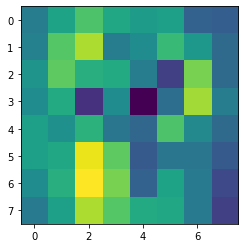

In [19]:
plt.imshow(ham_88L['image'][0])

-  8* 8이라 그런지 잘 보이지 않음

**ham_88_RGB 이미지 보기**

In [20]:
for i in range(0,10015):
    ham_88R['image'][i]=np.array(list(ham_88R.iloc[i, :-2].values), dtype=str)

In [21]:
for i in range(0,10015):
    ham_88R['image'][i]=np.array(list(ham_88R.iloc[i, :-2].values), dtype=int).reshape(8,8,3)

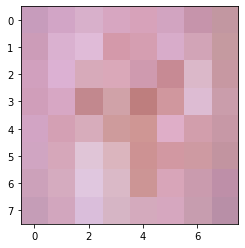

In [22]:
plt.imshow(ham_88R['image'][0])

hmnist_28_28_L vs hmnist_28_28_RGB
--

hmnist_28_28_L

In [23]:
ham_2828L['image']=0
ham_2828R['image']=0

In [24]:
print(len(ham_2828L.iloc[0, :-2]))
print(len(ham_2828R.iloc[0, :-2]))

784
2352


In [25]:
print(len(ham_2828L.iloc[:, 0]))
print(len(ham_2828R.iloc[:, 0]))

10015
10015


In [26]:
for i in range(0,10015):
    ham_2828L['image'][i]=np.array(list(ham_2828L.iloc[i, :-2].values), dtype=str)

In [27]:
for i in range(0,10015):
    ham_2828L['image'][i]=np.array(list(ham_2828L.iloc[i, :-2].values), dtype=int).reshape(28,28)

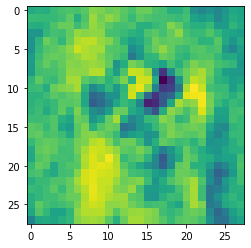

In [28]:
plt.imshow(ham_2828L['image'][0])

hmnist_28_28_RGB

In [29]:
from tqdm import tqdm

In [30]:
for i in tqdm(range(0,10015)):
    ham_2828R['image'][i]=np.array(list(ham_2828R.iloc[i, :-2].values), dtype=str)

100%|██████████| 10015/10015 [01:02<00:00, 161.04it/s]


In [31]:
for i in range(0,10015):
    ham_2828R['image'][i]=np.array(list(ham_2828R.iloc[i, :-2].values), dtype=int).reshape(28,28,3)

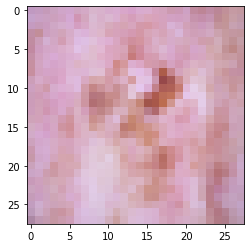

In [32]:
plt.imshow(ham_2828R['image'][0])

- 28 $\times$ 28이 가장 선명한 것을 볼 수 있다.

In [33]:
ham_meta.dx.value_counts()

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64

In [34]:
ham_2828R.label.value_counts()

4    6705
6    1113
2    1099
1     514
0     327
5     142
3     115
Name: label, dtype: int64

In [35]:
df_nv=ham_2828R.loc[ham_2828R['label']==4]
df_mel=ham_2828R.loc[ham_2828R['label']==6]
df_bkl=ham_2828R.loc[ham_2828R['label']==2]
df_bcc=ham_2828R.loc[ham_2828R['label']==1]
df_akiec=ham_2828R.loc[ham_2828R['label']==0]
df_vasc=ham_2828R.loc[ham_2828R['label']==5]
df_df=ham_2828R.loc[ham_2828R['label']==3]

In [36]:
df_nv=df_nv.reset_index()
df_mel=df_mel.reset_index()
df_bkl=df_bkl.reset_index()
df_bcc=df_bcc.reset_index()
df_akiec=df_akiec.reset_index()
df_vasc=df_vasc.reset_index()
df_df=df_df.reset_index()

df_nv.drop('index', axis=1, inplace=True)
df_mel.drop('index', axis=1, inplace=True)
df_bkl.drop('index', axis=1, inplace=True)
df_bcc.drop('index', axis=1, inplace=True)
df_akiec.drop('index', axis=1, inplace=True)
df_vasc.drop('index', axis=1, inplace=True)
df_df.drop('index', axis=1, inplace=True)

In [37]:
df_sample=pd.DataFrame(columns={'type','image'})

In [38]:
df_sample=df_sample.append({'type':'nv'}, ignore_index=True)
df_sample=df_sample.append({'type':'mel'}, ignore_index=True)
df_sample=df_sample.append({'type':'bkl'}, ignore_index=True)
df_sample=df_sample.append({'type':'bcc'}, ignore_index=True)
df_sample=df_sample.append({'type':'akiec'}, ignore_index=True)
df_sample=df_sample.append({'type':'vasc'}, ignore_index=True)
df_sample=df_sample.append({'type':'df'}, ignore_index=True)

In [39]:
df_sample['image'][0]=df_nv['image'][0]
df_sample['image'][1]=df_mel['image'][0]
df_sample['image'][2]=df_bkl['image'][0]
df_sample['image'][3]=df_bcc['image'][0]
df_sample['image'][4]=df_akiec['image'][0]
df_sample['image'][5]=df_vasc['image'][0]
df_sample['image'][6]=df_df['image'][0]

nv


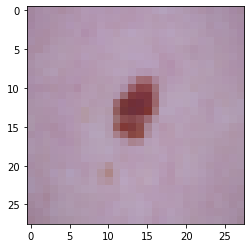

mel


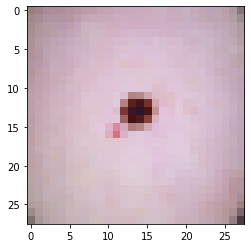

bkl


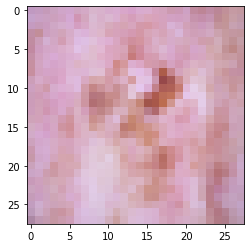

bcc


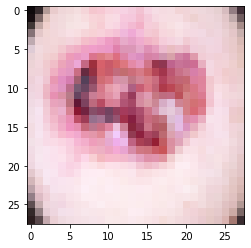

akiec


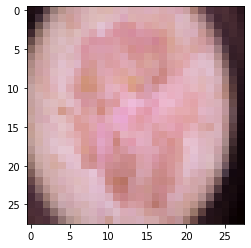

vasc


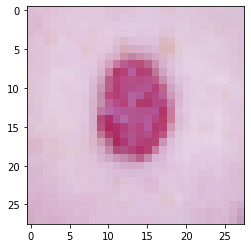

In [40]:
for i in range(0,6):
    print(df_sample['type'][i])
    plt.imshow(df_sample['image'][i])
    plt.show()

데이터 전처리
--

In [41]:
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [42]:
y=to_categorical(ham_2828R['label'], num_classes=7)

In [43]:
y

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [44]:
x=ham_2828R['image'].to_numpy()

In [45]:
x.shape

(10015,)

In [46]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=0)

In [47]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(8012,)
(8012, 7)
(2003,)
(2003, 7)


In [48]:
x_train[0][0].shape

(28, 3)

In [49]:
x_train=np.stack(x_train, axis=0)
x_test=np.stack(x_test, axis=0)

In [50]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(8012, 28, 28, 3)
(8012, 7)
(2003, 28, 28, 3)
(2003, 7)


In [51]:
x_train = np.reshape(x_train / 255, (-1, 28, 28, 3))
x_test = np.reshape(x_test / 255, (-1, 28, 28, 3))

In [112]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping
import os

In [113]:
from keras import layers, models
from keras import optimizers
from keras.layers import BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam

In [114]:
from keras import regularizers, optimizers
from tensorflow.keras import optimizers

In [115]:
seed=0
np.random.seed(seed)
tf.random.set_seed(seed)

Modeling
--

In [151]:
model = Sequential()
model.add(Conv2D(input_shape=(28,28,3),filters=32,kernel_size=(3,3),padding="same", activation="relu"))

#####
model.add(BatchNormalization())
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.2))
#####

#####
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.3))
#####

model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.4))

#####
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.5))


model.add(Flatten())

model.add(Dense(units=512,activation="relu"))
model.add(BatchNormalization())
model.add(Dense(7, activation='softmax'))

#opt=SGD(lr=0.1, momentum=0.9)

model.compile(loss='categorical_crossentropy', optimizer=tf.optimizers.Adam(learning_rate=1e-4), metrics=['acc'])

In [152]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_78 (Conv2D)           (None, 28, 28, 32)        896       
_________________________________________________________________
batch_normalization_70 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization_71 (Batc (None, 14, 14, 32)        128       
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 14, 14, 64)       

In [153]:
MODEL_DIR='C:/Users/bella/Desktop/SelfStudy/캐글/skincancer/model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="C:/Users/bella/Desktop/SelfStudy/캐글/skincancer/model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer=ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback=EarlyStopping(monitor='val_loss',patience=5) 

In [154]:
%%time
history=model.fit(x_train, y_train, batch_size=10, epochs=30, validation_data=(x_test,y_test), callbacks=[early_stopping_callback, checkpointer])

Epoch 1/30
802/802 [==============================] - ETA: 0s - loss: 1.7821 - acc: 0.4021
Epoch 00001: val_loss improved from inf to 2.05047, saving model to C:/Users/bella/Desktop/SelfStudy/캐글/skincancer/model\01-2.0505.hdf5
802/802 [==============================] - 125s 156ms/step - loss: 1.7821 - acc: 0.4021 - val_loss: 2.0505 - val_acc: 0.2182
Epoch 2/30
802/802 [==============================] - ETA: 0s - loss: 1.1374 - acc: 0.6209
Epoch 00002: val_loss improved from 2.05047 to 1.39304, saving model to C:/Users/bella/Desktop/SelfStudy/캐글/skincancer/model\02-1.3930.hdf5
802/802 [==============================] - 124s 155ms/step - loss: 1.1374 - acc: 0.6209 - val_loss: 1.3930 - val_acc: 0.4683
Epoch 3/30
802/802 [==============================] - ETA: 0s - loss: 1.0150 - acc: 0.6528
Epoch 00003: val_loss improved from 1.39304 to 1.22981, saving model to C:/Users/bella/Desktop/SelfStudy/캐글/skincancer/model\03-1.2298.hdf5
802/802 [==============================] - 126s 157ms/step - 

In [155]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [156]:
print("\n Train Accuracy %.4f"%(model.evaluate(x_train, y_train)[1]))

251/251 [==============================] - 11s 42ms/step - loss: 0.6909 - acc: 0.7483

 Train Accuracy 0.7483


In [157]:
print("\n Test Accuracy %.4f"%(model.evaluate(x_test, y_test)[1]))

63/63 [==============================] - 3s 41ms/step - loss: 0.7496 - acc: 0.7379

 Test Accuracy 0.7379


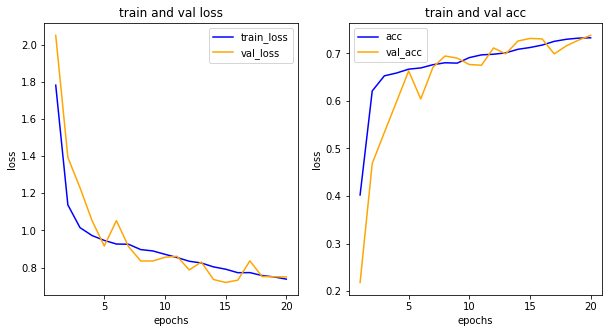

In [158]:
his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] # 검증 데이터가 있는 경우 val_ 수식어가 붙는다.

epochs = range(1,len(loss)+1 )
fig = plt.figure(figsize= (10,5) )

# 학습 및 검증 손실 그리기

ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 학습 및 검증 정확도 그리기
ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, acc, color = 'blue', label = 'acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('loss')
ax2.legend()

plt.show()

In [159]:
model.save('model_1.h5')

In [160]:
y_pred=model.predict(x_test)

In [162]:
model_acc=model.evaluate(x_test, y_test, verbose=0)[1]
y_pred=np.array(list(map(lambda x:np.argmax(x), y_pred)))

In [117]:
label_mapping={ 4:'nv', 6:'mel', 2:'bkl', 1:'bcc', 0:'akiec', 5:'vasc', 3:'df' }

In [116]:
from sklearn.metrics import classification_report
from sklearn.metrics import multilabel_confusion_matrix

In [175]:
y_test.shape

(2003, 7)

In [187]:
y_test_1=pd.DataFrame(y_test)

In [192]:
y_test_1['answer']=0

In [193]:
y_test_1

,0,1,2,3,4,5,6,answer
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...
1998,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1999,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
2000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2001,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0


In [197]:
for i in tqdm(range(0,2003)):
    for j in range(0,7):
        if y_test_1.iloc[i, j]==1:
            y_test_1['answer'][i]=j

100%|██████████| 2003/2003 [00:01<00:00, 1069.43it/s]


In [198]:
y_test_1

,0,1,2,3,4,5,6,answer
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...
1998,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4
1999,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6
2000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4
2001,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4


In [199]:
y_true=np.array(y_test_1['answer'])

In [209]:
y_true.shape

(2003,)

In [212]:
y_pred.shape

(2003,)

In [118]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

In [215]:
auc_roc=metrics.classification_report(y_true, y_pred)

In [219]:
print(auc_roc)

              precision    recall  f1-score   support

           0       0.29      0.16      0.21        61
           1       0.41      0.73      0.53       111
           2       0.39      0.48      0.43       198
           3       0.00      0.00      0.00        29
           4       0.86      0.91      0.89      1351
           5       0.57      0.83      0.68        30
           6       0.70      0.14      0.23       223

    accuracy                           0.74      2003
   macro avg       0.46      0.47      0.42      2003
weighted avg       0.74      0.74      0.71      2003



$ Precision = \frac{TP}{TP+FP} $,
$ Recall = \frac{TP}{TP+FN} $

label_mapping={ 4:'nv', 6:'mel', 2:'bkl', 1:'bcc', 0:'akiec', 5:'vasc', 3:'df' }

df은 아예 맞추지 못한 것을 알 수 있다,

반면, nv의 결과가 가장 좋은 것을 알 수 있다.

이를 통해, df의 학습 데이터 양이 적었다는 것을 유추해볼 수 있다.

In [323]:
mul=multilabel_confusion_matrix(y_true, y_pred)
print(mul)

[[[1918   24]
  [  51   10]]

 [[1776  116]
  [  30   81]]

 [[1655  150]
  [ 102   96]]

 [[1974    0]
  [  29    0]]

 [[ 449  203]
  [ 116 1235]]

 [[1954   19]
  [   5   25]]

 [[1767   13]
  [ 192   31]]]


In [233]:
label=['akiec', 'bcc','bkl','df','nv','vasc','mel']

In [237]:
for i in range(7):
    con_mul=pd.DataFrame(mul[i])
    print(label[i])
    print(con_mul)

akiec
      0   1
0  1918  24
1    51  10
bcc
      0    1
0  1776  116
1    30   81
bkl
      0    1
0  1655  150
1   102   96
df
      0  1
0  1974  0
1    29  0
nv
     0     1
0  449   203
1  116  1235
vasc
      0   1
0  1954  19
1     5  25
mel
      0   1
0  1767  13
1   192  31


akiec


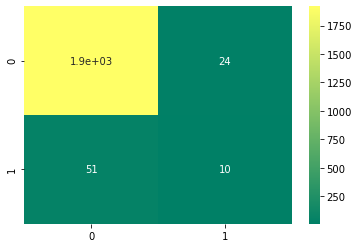

bcc


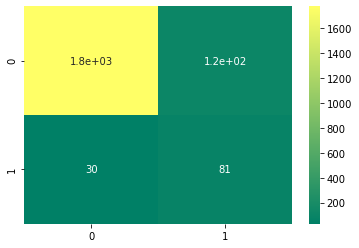

bkl


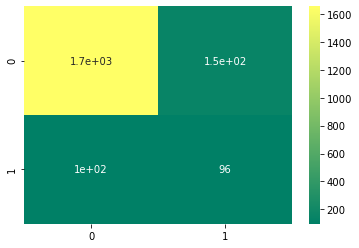

df


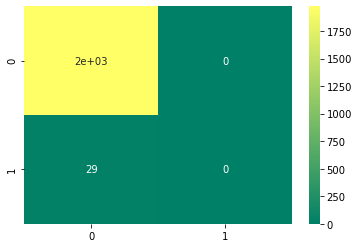

nv


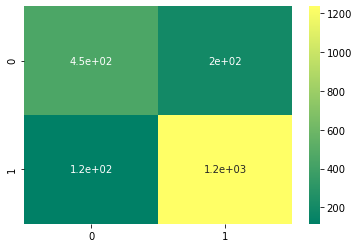

vasc


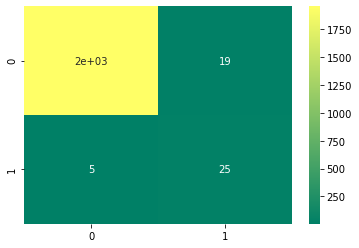

mel


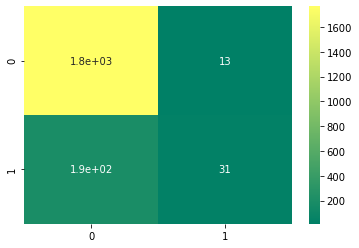

In [243]:
for i in range(7):
    con_mul=pd.DataFrame(mul[i])
    print(label[i])
    sns.heatmap(con_mul, annot=True, cmap="summer")
    plt.show()

Modeling2
--

loss, acc: cross_entropy, acc에서 sparse_cross_entropy, sparse_categorical_accuracy으로 변경해서 모델링

In [326]:
x=ham_2828R['image'].to_numpy()
#y=to_categorical(ham_2828R['label'], num_classes=7)
y=ham_2828R['label'].values

In [327]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=0)

In [328]:
x_train=np.stack(x_train, axis=0)
x_test=np.stack(x_test, axis=0)

In [329]:
x_train = np.reshape(x_train / 255, (-1, 28, 28, 3))
x_test = np.reshape(x_test / 255, (-1, 28, 28, 3))

In [330]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(8012, 28, 28, 3)
(8012,)
(2003, 28, 28, 3)
(2003,)


In [331]:
model = Sequential()
model.add(Conv2D(input_shape=(28,28,3),filters=32,kernel_size=(3,3),padding="same", activation="relu"))

#####
model.add(BatchNormalization())
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.2))
#####

#####
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.3))
#####

model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.4))

#####
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.5))


model.add(Flatten())

model.add(Dense(units=512,activation="relu"))
model.add(BatchNormalization())
model.add(Dense(7, activation='softmax'))

#opt=SGD(lr=0.1, momentum=0.9)

model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.optimizers.Adam(learning_rate=1e-4), metrics=['sparse_categorical_accuracy'])

In [332]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_174 (Conv2D)          (None, 28, 28, 32)        896       
_________________________________________________________________
batch_normalization_166 (Bat (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_175 (Conv2D)          (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_59 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_53 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization_167 (Bat (None, 14, 14, 32)        128       
_________________________________________________________________
conv2d_176 (Conv2D)          (None, 14, 14, 64)      

In [333]:
MODEL_DIR='C:/Users/bella/Desktop/SelfStudy/캐글/skincancer/model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="C:/Users/bella/Desktop/SelfStudy/캐글/skincancer/model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer=ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback=EarlyStopping(monitor='val_loss',patience=5) 

In [334]:
%%time
history=model.fit(x_train, y_train, batch_size=10, epochs=30, validation_data=(x_test,y_test), callbacks=[early_stopping_callback, checkpointer])

Epoch 1/30
802/802 [==============================] - ETA: 0s - loss: 1.8099 - sparse_categorical_accuracy: 0.3994
Epoch 00001: val_loss improved from inf to 2.14613, saving model to C:/Users/bella/Desktop/SelfStudy/캐글/skincancer/model\01-2.1461.hdf5
802/802 [==============================] - 181s 226ms/step - loss: 1.8099 - sparse_categorical_accuracy: 0.3994 - val_loss: 2.1461 - val_sparse_categorical_accuracy: 0.3420
Epoch 2/30
802/802 [==============================] - ETA: 0s - loss: 1.1636 - sparse_categorical_accuracy: 0.6223
Epoch 00002: val_loss improved from 2.14613 to 1.30426, saving model to C:/Users/bella/Desktop/SelfStudy/캐글/skincancer/model\02-1.3043.hdf5
802/802 [==============================] - 190s 236ms/step - loss: 1.1636 - sparse_categorical_accuracy: 0.6223 - val_loss: 1.3043 - val_sparse_categorical_accuracy: 0.5612
Epoch 3/30
802/802 [==============================] - ETA: 0s - loss: 1.0210 - sparse_categorical_accuracy: 0.6558
Epoch 00003: val_loss improved fr

In [335]:
history.history.keys()

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])

In [336]:
print("\n Train Accuracy %.4f"%(model.evaluate(x_train, y_train)[1]))

251/251 [==============================] - 11s 43ms/step - loss: 0.6492 - sparse_categorical_accuracy: 0.7596

 Train Accuracy 0.7596


In [337]:
print("\n Test Accuracy %.4f"%(model.evaluate(x_test, y_test)[1]))

63/63 [==============================] - 3s 40ms/step - loss: 0.7318 - sparse_categorical_accuracy: 0.7309

 Test Accuracy 0.7309


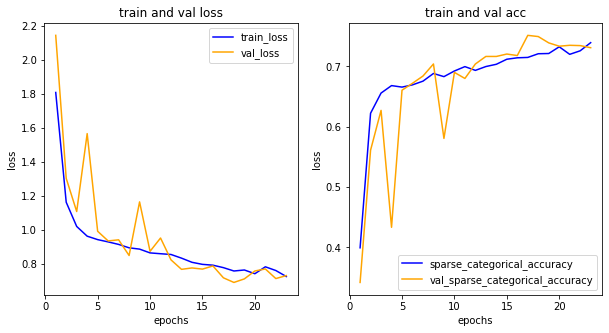

In [338]:
his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] # 검증 데이터가 있는 경우 val_ 수식어가 붙는다.

epochs = range(1,len(loss)+1 )
fig = plt.figure(figsize= (10,5) )

# 학습 및 검증 손실 그리기

ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['sparse_categorical_accuracy']
val_acc = his_dict['val_sparse_categorical_accuracy']

# 학습 및 검증 정확도 그리기
ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, acc, color = 'blue', label = 'sparse_categorical_accuracy')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_sparse_categorical_accuracy')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('loss')
ax2.legend()

plt.show()

In [341]:
y_pred=model.predict(x_test)

In [347]:
y_pred=np.array(list(map(lambda x:np.argmax(x), y_pred)))

In [349]:
y_pred.shape

(2003,)

In [345]:
y_test.shape

(2003,)

In [350]:
auc_roc=metrics.classification_report(y_test, y_pred)
print(auc_roc)

              precision    recall  f1-score   support

           0       0.23      0.62      0.34        61
           1       0.67      0.27      0.38       111
           2       0.37      0.51      0.43       198
           3       0.00      0.00      0.00        29
           4       0.87      0.91      0.89      1351
           5       0.80      0.53      0.64        30
           6       0.60      0.25      0.35       223

    accuracy                           0.73      2003
   macro avg       0.51      0.44      0.43      2003
weighted avg       0.75      0.73      0.72      2003



In [351]:
mul=multilabel_confusion_matrix(y_true, y_pred)
print(mul)

[[[1815  127]
  [  23   38]]

 [[1877   15]
  [  81   30]]

 [[1631  174]
  [  97  101]]

 [[1974    0]
  [  29    0]]

 [[ 470  182]
  [ 128 1223]]

 [[1969    4]
  [  14   16]]

 [[1743   37]
  [ 167   56]]]


akiec


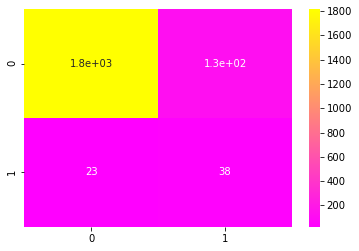

bcc


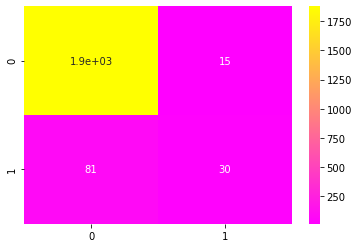

bkl


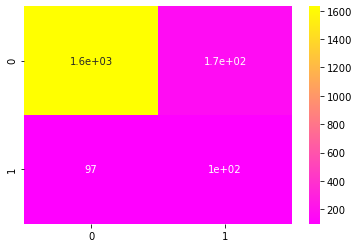

df


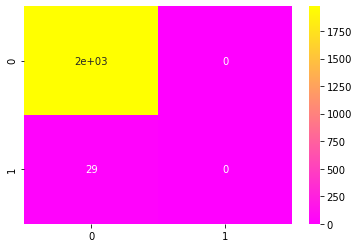

nv


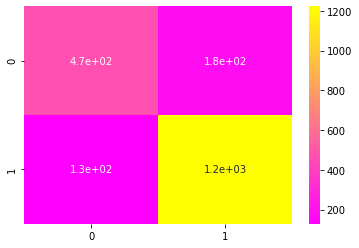

vasc


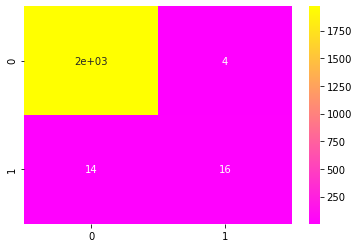

mel


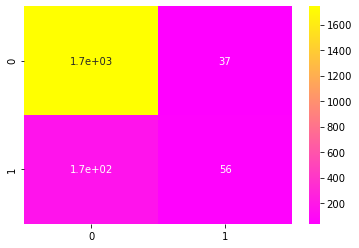

In [353]:
for i in range(7):
    con_mul=pd.DataFrame(mul[i])
    print(label[i])
    sns.heatmap(con_mul, annot=True, cmap="spring")
    plt.show()

- Sparse_Categorical_entropy 와 Categorical_entropy의 결과가 미세한 차이는 존재하지만 큰 차이는 없어 보인다.

OVER SAMPLING(SMOTE)
--

In [60]:
#!pip install imbalanced-learn

<AxesSubplot:xlabel='dx', ylabel='count'>

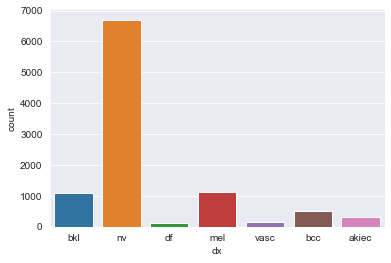

In [311]:
sns.set_style("darkgrid")
sns.countplot(ham_meta.dx)

In [312]:
from imblearn.over_sampling import SMOTE

**SMOTE**

동일한 데이터를 단순히 증식시켜버리면 과적합이 발생하기 때문에, SMOTE는 적은 데이터 세트에 있는 개별 데이터들의 K 최근접 이웃(K Nearest Neighbor)을 찾아 이 데이터와 K개 이웃들의 차이를 일정 값으로 만들어 기존 데이터와 약간만 차이가 나는 새로운 데이터를 생성한다.

In [324]:
y=ham_2828R[['label']]
x=ham_2828R.iloc[:, :-2]

In [325]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=0)

In [326]:
sm=SMOTE(random_state=0)
x_train, y_train=sm.fit_resample(x_train, y_train)

In [327]:
y_train.value_counts()

label
0        5354
1        5354
2        5354
3        5354
4        5354
5        5354
6        5354
dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

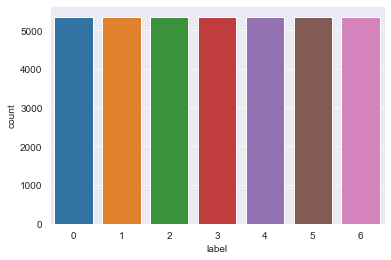

In [328]:
sns.countplot(y_train.label)

In [329]:
y_test=y_test.reset_index()
y_test.drop('index', axis=1, inplace=True)
x_test=x_test.reset_index()
x_test.drop('index', axis=1, inplace=True)

In [330]:
x_train['image']=0
x_test['image']=0

In [331]:
y_train=to_categorical(y_train['label'], num_classes=7)
y_test=to_categorical(y_test['label'], num_classes=7)

In [334]:
x_train

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,image
0,209,116,122,214,121,131,214,118,120,213,...,196,113,98,192,108,92,188,104,90,0
1,243,189,193,245,188,191,244,190,197,244,...,229,181,176,229,182,176,228,181,175,0
2,192,158,157,195,159,160,197,161,168,202,...,181,156,164,168,142,142,143,116,119,0
3,141,107,110,159,123,124,168,130,130,176,...,163,122,133,153,112,122,144,104,112,0
4,218,140,166,224,148,174,230,156,182,230,...,214,148,163,214,146,162,211,146,162,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37473,176,146,164,179,149,167,183,154,172,185,...,193,177,198,190,174,193,187,167,185,0
37474,125,109,114,155,134,145,161,138,152,166,...,69,61,72,16,13,19,11,7,11,0
37475,179,152,164,181,152,166,184,155,169,188,...,205,188,197,204,190,197,201,189,197,0
37476,166,117,126,166,112,118,169,120,133,173,...,166,123,140,165,122,142,161,114,131,0


In [335]:
x_test

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,image
0,232,143,169,236,150,175,236,150,177,235,...,218,144,148,216,145,147,216,145,148,0
1,220,155,157,219,151,154,216,144,141,212,...,214,150,151,218,158,156,217,162,158,0
2,0,0,0,0,0,0,18,8,11,44,...,61,32,42,27,13,17,1,0,0,0
3,152,110,128,167,127,146,171,132,155,174,...,165,127,154,164,129,155,159,125,150,0
4,201,172,171,204,174,175,210,182,187,212,...,158,122,123,153,117,120,146,110,114,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998,155,129,145,164,141,157,167,145,160,167,...,167,139,155,165,137,155,162,134,151,0
1999,17,16,16,50,42,49,119,111,126,148,...,129,115,113,88,75,75,32,27,29,0
2000,222,152,143,225,154,146,229,155,152,229,...,204,130,119,203,131,119,201,132,122,0
2001,11,10,11,11,10,11,13,10,12,57,...,144,135,133,124,114,111,60,53,54,0


In [336]:
for i in tqdm(range(0,37478)):
    x_train['image'][i]=np.array(list(x_train.iloc[i, :-1].values), dtype=str)

100%|██████████| 37478/37478 [04:22<00:00, 142.81it/s]


In [337]:
for i in tqdm(range(0,37478)):
    x_train['image'][i]=np.array(list(x_train.iloc[i, :-1].values), dtype=int).reshape(28,28,3)

100%|██████████| 37478/37478 [03:08<00:00, 198.31it/s]


In [338]:
for i in tqdm(range(0,2003)):
    x_test['image'][i]=np.array(list(x_test.iloc[i, :-1].values), dtype=str)

100%|██████████| 2003/2003 [00:12<00:00, 160.21it/s]


In [339]:
for i in tqdm(range(0,2003)):
    x_test['image'][i]=np.array(list(x_test.iloc[i, :-1].values), dtype=int).reshape(28,28,3)

100%|██████████| 2003/2003 [00:06<00:00, 290.92it/s]


In [340]:
x_test.head(2)

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,image
0,232,143,169,236,150,175,236,150,177,235,...,218,144,148,216,145,147,216,145,148,"[[[232, 143, 169], [236, 150, 175], [236, 150,..."
1,220,155,157,219,151,154,216,144,141,212,...,214,150,151,218,158,156,217,162,158,"[[[220, 155, 157], [219, 151, 154], [216, 144,..."


In [341]:
x_train=x_train['image'].to_numpy()
x_test=x_test['image'].to_numpy()

In [342]:
x_train=np.stack(x_train, axis=0)
x_test=np.stack(x_test, axis=0)

In [343]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(37478, 28, 28, 3)
(2003, 28, 28, 3)
(37478, 7)
(2003, 7)


이번에는 x_train, x_test의 각 원소들을 255으로 나누지 않고, 평균과 표준편차를 이용하여 표준화하겠습니다.

$$ z= \frac{X- \mu}{\sigma} $$

- Standardization (StandardScaler)

In [344]:
print("x_train 평균", np.mean(x_train))
print("x_train 표준편차", np.std(x_train))
print("x_test 평균", np.mean(x_test))
print("x_test 표준편차", np.std(x_test))

x_train 평균 163.4243830189902
x_train 표준편차 38.85293496890912
x_test 평균 160.04596273107344
x_test 표준편차 46.062441632086625


In [345]:
x_train_mean=np.mean(x_train)
x_train_std=np.std(x_train)
x_test_mean=np.mean(x_test)
x_test_std=np.std(x_test)

x_train = (x_train - x_train_mean)/ x_train_std
x_test = (x_test - x_test_mean) / x_test_std

x_train = np.reshape(x_train, (-1, 28, 28, 3))
x_test = np.reshape(x_test, (-1, 28, 28, 3))

In [346]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(37478, 28, 28, 3)
(37478, 7)
(2003, 28, 28, 3)
(2003, 7)


Modeling3
--

In [347]:
seed=0
np.random.seed(seed)
tf.random.set_seed(seed)

In [348]:
model = Sequential()
model.add(Conv2D(input_shape=(28,28,3),filters=32,kernel_size=(3,3),padding="same", activation="relu"))

#####
model.add(BatchNormalization())
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.2))
#####

#####
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.3))
#####

model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.4))

#####
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.5))


model.add(Flatten())

model.add(Dense(units=512,activation="relu"))
model.add(BatchNormalization())
model.add(Dense(7, activation='softmax'))

#opt=SGD(lr=0.1, momentum=0.9)

model.compile(loss='categorical_crossentropy', optimizer=tf.optimizers.Adam(learning_rate=1e-4), metrics=['acc'])

In [349]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 28, 28, 32)        896       
_________________________________________________________________
batch_normalization_48 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization_49 (Batc (None, 14, 14, 32)        128       
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 14, 14, 64)       

In [350]:
MODEL_DIR='C:/Users/bella/Desktop/SelfStudy/캐글/skincancer/model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="C:/Users/bella/Desktop/SelfStudy/캐글/skincancer/model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer=ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback=EarlyStopping(monitor='val_loss',patience=5) 

In [351]:
%%time
history=model.fit(x_train, y_train, batch_size=10, epochs=30, validation_data=(x_test,y_test), callbacks=[early_stopping_callback, checkpointer])

Epoch 1/30
3748/3748 [==============================] - ETA: 0s - loss: 1.6542 - acc: 0.3796
Epoch 00001: val_loss improved from inf to 3.11223, saving model to C:/Users/bella/Desktop/SelfStudy/캐글/skincancer/model\01-3.1122.hdf5
3748/3748 [==============================] - 2291s 611ms/step - loss: 1.6542 - acc: 0.3796 - val_loss: 3.1122 - val_acc: 0.1692
Epoch 2/30
3748/3748 [==============================] - ETA: 0s - loss: 1.2170 - acc: 0.5469
Epoch 00002: val_loss improved from 3.11223 to 2.29239, saving model to C:/Users/bella/Desktop/SelfStudy/캐글/skincancer/model\02-2.2924.hdf5
3748/3748 [==============================] - 2309s 616ms/step - loss: 1.2170 - acc: 0.5469 - val_loss: 2.2924 - val_acc: 0.2991
Epoch 3/30
3748/3748 [==============================] - ETA: 0s - loss: 0.9695 - acc: 0.6496
Epoch 00003: val_loss did not improve from 2.29239
3748/3748 [==============================] - 2306s 615ms/step - loss: 0.9695 - acc: 0.6496 - val_loss: 2.3721 - val_acc: 0.2396
Epoch 4/30

In [352]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [353]:
print("\n Train Accuracy %.4f"%(model.evaluate(x_train, y_train)[1]))

1172/1172 [==============================] - 1263s 1s/step - loss: 0.1355 - acc: 0.9535

 Train Accuracy 0.9535


In [354]:
print("\n Test Accuracy %.4f"%(model.evaluate(x_test, y_test)[1]))

63/63 [==============================] - 70s 1s/step - loss: 1.3724 - acc: 0.5597

 Test Accuracy 0.5597


- 과적합 현상이 일어남

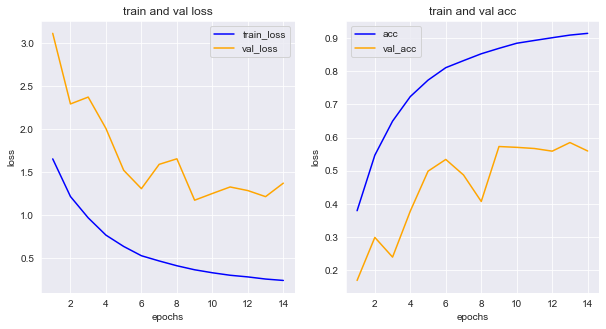

In [355]:
his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] # 검증 데이터가 있는 경우 val_ 수식어가 붙는다.

epochs = range(1,len(loss)+1 )
fig = plt.figure(figsize= (10,5) )

# 학습 및 검증 손실 그리기

ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 학습 및 검증 정확도 그리기
ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, acc, color = 'blue', label = 'acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('loss')
ax2.legend()

plt.show()

In [356]:
model.save('model_1.h5')
y_pred=model.predict(x_test)
model_acc=model.evaluate(x_test, y_test, verbose=0)[1]
y_pred=np.array(list(map(lambda x:np.argmax(x), y_pred)))
label_mapping={ 4:'nv', 6:'mel', 2:'bkl', 1:'bcc', 0:'akiec', 5:'vasc', 3:'df' }

In [357]:
y_test_1=pd.DataFrame(y_test)
y_test_1['answer']=0

In [358]:
for i in tqdm(range(0,2003)):
    for j in range(0,7):
        if y_test_1.iloc[i, j]==1:
            y_test_1['answer'][i]=j

100%|██████████| 2003/2003 [00:01<00:00, 1331.87it/s]


In [359]:
y_test_1

,0,1,2,3,4,5,6,answer
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...
1998,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4
1999,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6
2000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4
2001,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4


In [360]:
y_true=np.array(y_test_1['answer'])
print(y_true.shape)
print(y_pred.shape)

(2003,)
(2003,)


In [361]:
auc_roc=metrics.classification_report(y_true, y_pred)
print(auc_roc)

              precision    recall  f1-score   support

           0       0.32      0.46      0.38        61
           1       0.43      0.66      0.52       111
           2       0.21      0.76      0.33       198
           3       0.34      0.66      0.45        29
           4       0.95      0.56      0.71      1351
           5       0.84      0.87      0.85        30
           6       0.42      0.29      0.34       223

    accuracy                           0.56      2003
   macro avg       0.50      0.61      0.51      2003
weighted avg       0.76      0.56      0.61      2003



In [362]:
mul=multilabel_confusion_matrix(y_true, y_pred)

In [363]:
label=['akiec', 'bcc','bkl','df','nv','vasc','mel']
for i in range(7):
    con_mul=pd.DataFrame(mul[i])
    print(label[i])
    print(con_mul)

akiec
      0   1
0  1882  60
1    33  28
bcc
      0   1
0  1794  98
1    38  73
bkl
      0    1
0  1252  553
1    47  151
df
      0   1
0  1937  37
1    10  19
nv
     0    1
0  613   39
1  592  759
vasc
      0   1
0  1968   5
1     4  26
mel
      0   1
0  1690  90
1   158  65


akiec


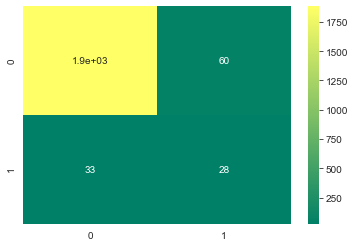

bcc


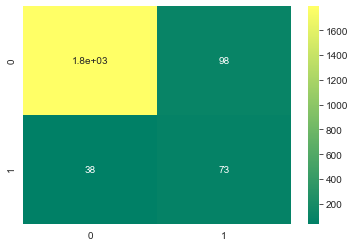

bkl


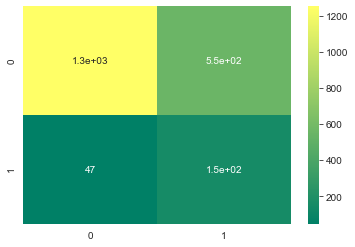

df


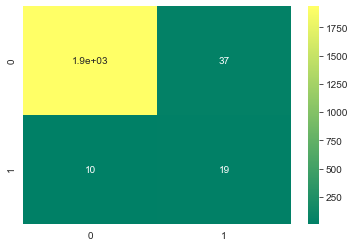

nv


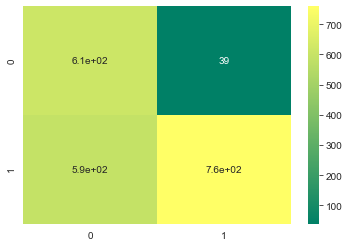

vasc


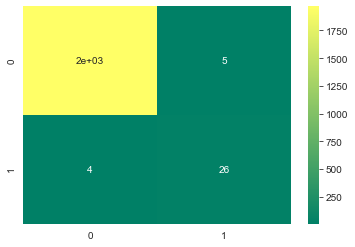

mel


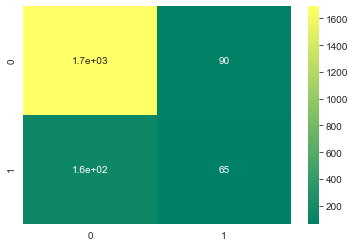

In [364]:
for i in range(7):
    con_mul=pd.DataFrame(mul[i])
    print(label[i])
    sns.heatmap(con_mul, annot=True, cmap="summer")
    plt.show()

- 오히려 결과가 더 안 좋아진 것을 확인 할 수 있다.

Modeling4 (+StratifiedKFold)
--

In [295]:
seed=0
np.random.seed(seed)
tf.random.set_seed(seed)

In [296]:
from sklearn.model_selection import StratifiedKFold

n_fold=10
skf=StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=0)

In [310]:
#%%time
#accuracy=[]

#for train, test in skf.split(x_train, y_train):
#    model = Sequential()
#    model.add(Conv2D(input_shape=(28,28,3),filters=32,kernel_size=(3,3),padding="same", activation="relu"))
#    #####
#    model.add(BatchNormalization())
#    model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same", activation="relu"))
#    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
#    model.add(Dropout(0.2))
#    #####
#
#    #####
#    model.add(BatchNormalization())
#    model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
#    model.add(BatchNormalization())
#    model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
#    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
#    model.add(Dropout(0.3))
#    #####
#    
#    model.add(BatchNormalization())
#    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
#    model.add(BatchNormalization())
#    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
#    model.add(BatchNormalization())
#    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
#    model.add(BatchNormalization())
#    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
#    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
#    model.add(Dropout(0.4))
#    #####
#    model.add(BatchNormalization())
#    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
#    model.add(BatchNormalization())
#    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
#    model.add(BatchNormalization())
#    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
#    model.add(BatchNormalization())
#    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
#    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
#    model.add(Dropout(0.5))
#    
#    model.add(Flatten())
#    model.add(Dense(units=512,activation="relu"))
#    model.add(BatchNormalization())
#    model.add(Dense(7, activation='softmax'))
#    
#    #opt=SGD(lr=0.1, momentum=0.9)
#    model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.optimizers.Adam(learning_rate=1e-4), metrics=['sparse_categorical_accuracy'])
#    model.fit(x_train[train], y_train[train], batch_size=10, epochs=30)
#    k_accuracy="%.4f"%(model.evaluate(x_train[test], y_train[test])[1])
#    accuracy.append(k_accuracy)    

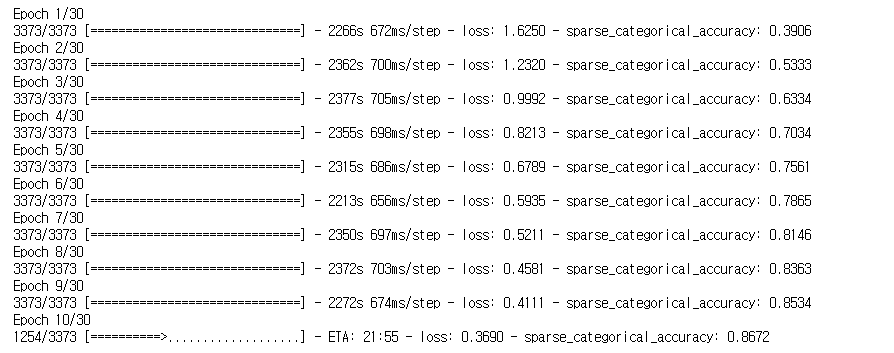

- 너무 오래걸리므로 중단